In [1]:
import numpy as np
np.set_printoptions(precision=3)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

# Sampling from continuous distributions - Inverse sampling

## Objectives

+ Demonstrate how we can sample from continuous distributions using the method of inverse sampling.


## Readings

+ These notes.

## Inverse sampling
How do you sample an arbitrary univariate continuous random variable $X$ with CDF $F(x)$.
In this scenario, *inverse sampling* is the way to go.
It relies on the observation that the random variable

$$
Y = F^{-1}(U),
$$

where $F^{-1}$ is the inverse of the CDF of $X$ and $U\sim\mathcal{U}([0,1])$ has exactly the same distribution as $X$.

We will demonstrate this by example. To this end, let us consider an [exponential random variable](https://en.wikipedia.org/wiki/Exponential_distribution):

$$
X \sim \operatorname{Exp}(r),
$$

where $r > 0$ is known as the *rate parameter*.
The exponential distribution describes the time it passes between random events that occur at a constnat rate $r$.
The CDF of the Exponential is:

$$
F(x) = p(X\le x) = 1 - e^{-rx}.
$$

Let's plot it for $r=0.5$.

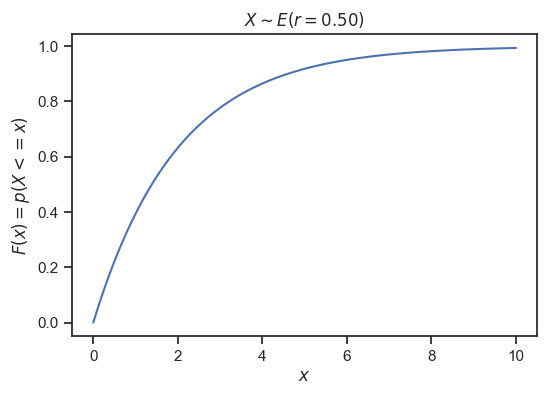

In [2]:
import scipy.stats as st

r = 0.5
X = st.expon(scale=1.0 / r)

fig, ax = plt.subplots()
x = np.linspace(0., 5. / r, 100)
ax.plot(x, X.cdf(x))
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$F(x) = p(X <= x)$")
ax.set_title(f"$X\sim E(r={r:1.2f})$");

To sample $T$ using inverse sampling, we need the inverse of the CDF. This is easily shown to be:

$$
F^{-1}(u) = -\frac{\ln(1-u)}{r}.
$$

Let's see if this is going to give us the right samples.
We will compare the empirical histogram obtained by inverse sampling to the actual PDF $p(x)$. Here is the code for inverse sampling:

In [3]:
def sample_exp(r : float):
    """Sample from an exponential.
    
    Arguments:
    r  --  The rate parameter.
    """
    u = np.random.rand()
    return -np.log(1. - u) / r

And here is the histogram of some samples:

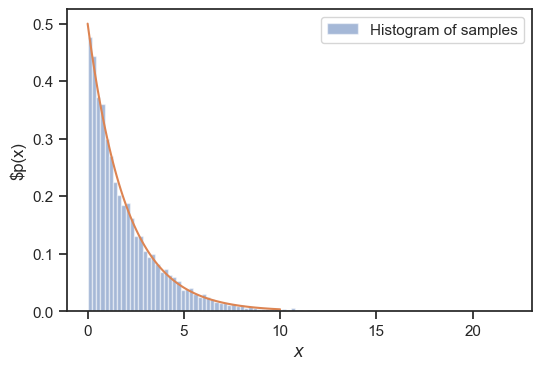

In [4]:
N = 10000
x_samples = np.array(
    [sample_exp(r) for _ in range(N)]
)

fig, ax = plt.subplots()
ax.hist(
    x_samples,
    alpha=0.5,
    density=True,
    bins=100,
    label="Histogram of samples"
)
ax.plot(x, X.pdf(x))
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$p(x)")
plt.legend(loc=r"best");

## Questions

+ Modify the code above to implement inverse sampling for a univariate Gaussian with zero mean and unit variance. Use ``scipy.stats`` to find the inverse CDF of the Gaussian (It is ``st.norm.ppf``). Here is how to use it:

In [5]:
# Standard normal random variable
Z = st.norm(loc=0.0, scale=1.0)
# The inverse CDF of the standard normal, say at 0.7, can be evaluated by:
Z.ppf(0.7)

0.5244005127080407